<a href="https://colab.research.google.com/github/IsauraRs/SeminarioML_IIMAS/blob/main/ConvolutionalNeuralNetworks_IIMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Machine Learning
![traditionalProgramming](https://drive.google.com/uc?export=view&id=1e_ArhhA1V695Z8GtH_lcQPBR6r7vh8zV)


![ML](https://drive.google.com/uc?export=view&id=19SvXRyCmw7ii0LP_Buvyvr8pqYLcgUxp)


![NN](https://drive.google.com/uc?export=view&id=1NPsqrfRS5go8T2uH4QeDdBERUR27QTJF)


# ¿Cómo aprende una red neuronal?


Se debe tener datos de entrada "x", y la salida "y" para el número de ejemplos en el set de entrenamiento (lo que queremos predecir).

Cada conexión tiene un peso asociado 


### Minimización de riesgo empírica


* Función de pérdida que defina una penalización para predicciones pobres.

* Se busca minimizar la pérdida promedio 


Los pesos deberían ser inicializados de manera aleatoria, una manera en la que se pueden generar valores entre -1 y 1, siempre y cuando la función random genere valores entre 0 y 1.

$$w = 2 * (random - 0.5) * scale$$

scale es un factor de escala que permite ajustar qué valor máximo y mínimo que tendrán los pesos.

Los pesos se actualizarán durante el entrenamiento a fin de obtener valores óptimos 

En Keras, se puede usar lo siguiente para inicializar pesos y sesgos (_bias_)

```python

weight_initializer = tf.keras.initializers.RandomNormal()

bias_initializer = tf.keras.initializers.Zeros()

```


**Este paso puede omitirse en la práctica, ya que Keras lo hace automáticamente.**

In [ ]:
from numpy.random import uniform as u
import numpy as np

class NeuralNet:

  #Se crea el constructor de la clase, que tomará como parámetros
  #el número de capas ocultas y el número de neuronas por capa oculta.
  def __init__(self, n_layers=1, n_neurons=4):

    #Se definen pesos y bias en la capa de entrada
    self.w_in = u(-1, 1, (2, n_neurons))
    self.b_in = u(-1, 1, n_neurons)

    #Se definen pesos y bias en capas ocultas
    self.w_hidden = u(-3, 3, (n_layers, n_neurons, n_neurons))
    self.b_hidden = u(-1, 1, (n_layers, n_neurons)) #bias

    #Se definen pesos y bias en las capas de salida
    self.w_out = u(-1, 1, (n_neurons, 1)) #número de neuronas de la última capa a 1
    self.b_out = u(-1, 1, 1)

  #vector de entrada, matriz de pesos y matriz de bias

  @staticmethod
  def activate_layer(y_in, w, b):
    #z = np.dot(y_in, w) + b
    #s = 1. / (1. + np.exp(-z))

     z = np.dot(y_in, w) + b # TODO y_in · w + b
     s = 1. / (1. + np.exp(-z))
     
     return s 


    # Esto funciona para una sola capa. La salida de una capa es el vector
    #De entrada de la siguiente capa.

  def feedforward(self, y_in):

    y = self.activate_layer(y_in, self.w_in, self.b_in) #Se activa la capa de entrada para pasar a la siguiente
    
    #Activa cada capa
    for i in range(self.w_hidden.shape[0]):

      y = self.activate_layer(y, self.w_hidden[i], self.b_hidden[i])

    output = self.activate_layer(y, self.w_out, self.b_out)

    return output

  
  #Para visualizar el mapeo de la red neuronal en un plano 2D
  def visualize(self, grid_size = 50, colormap = 'viridis', c_reverse = False):

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 300

    #Toma una rejilla de valores de -0.5 a 0.5, toma pares y los mete a la red
    x = np.linspace(-0.5, 0.5, grid_size)
    y = np.linspace(-0.5, 0.5, grid_size)
    xx, yy = np.meshgrid(x,y)

    #Se hace una lista pra los puntos(x,y) (coordenadas) en la  rejilla
    x_flat = xx.flatten()
    y_flat = yy.flatten()
    y_in = zip(x_flat, y_flat)
    y_in = np.array(list(y_in))

    #Se hace feedforward con la red
    y_out = self.feedforward(y_in)

    #Se redimensiona la rejilla
    y_out_2d = np.reshape(y_out, (grid_size, grid_size))

    if c_reverse:

      cmap = plt.cm.get_cmap(colormap)
      cmap = cmap.reversed()

    else:

      cmap = colormap

    #Se grafican los resultados de la red
    plt.figure(figsize = (10, 10))
    plt.axes([0, 0, 1, 1])
    plt.imshow(
        y_out_2d,
        extent = [-0.5, 0.5, -0.5, 0.5],
        interpolation = 'nearest',
        cmap = cmap
    )
    plt.axis(False)
    plt.show()

In [ ]:
y_in = np.array([0.8, 0.2])

In [ ]:
nn = NeuralNet()

In [ ]:
nn.feedforward(y_in)

array([0.49123629])

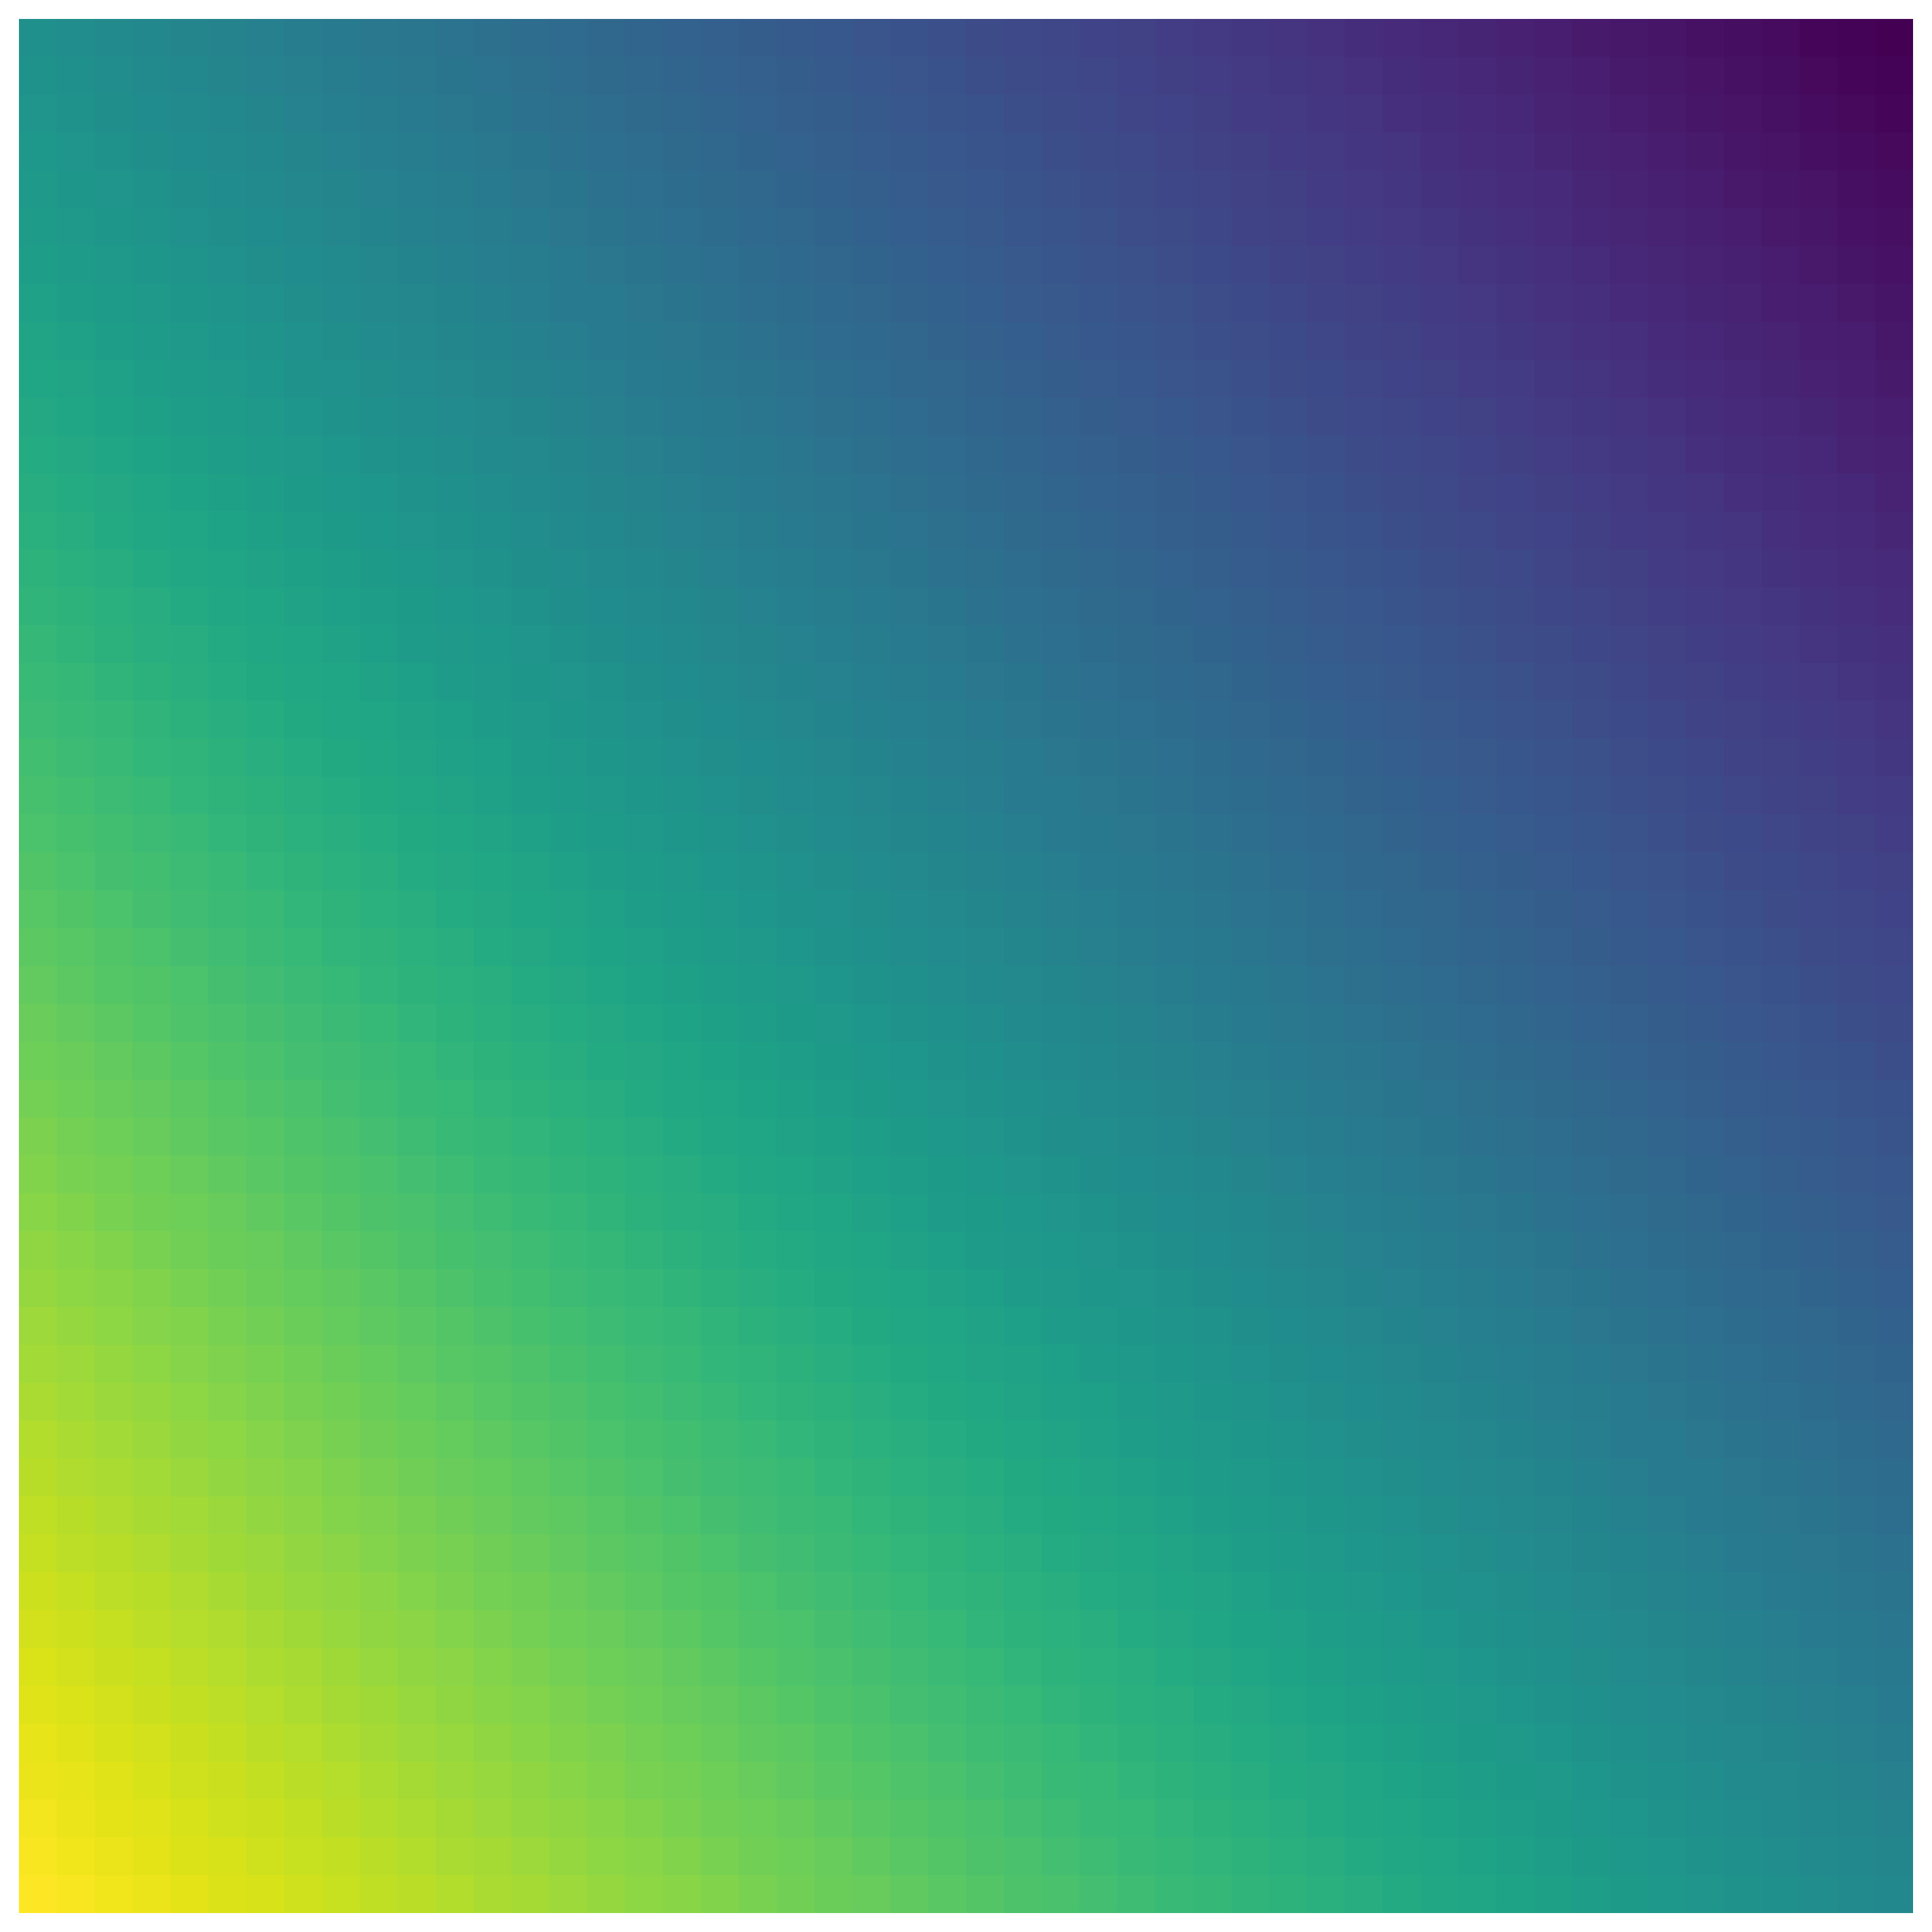

In [ ]:
nn.visualize()

In [ ]:
deep_nn = NeuralNet(n_layers=20, n_neurons=100)

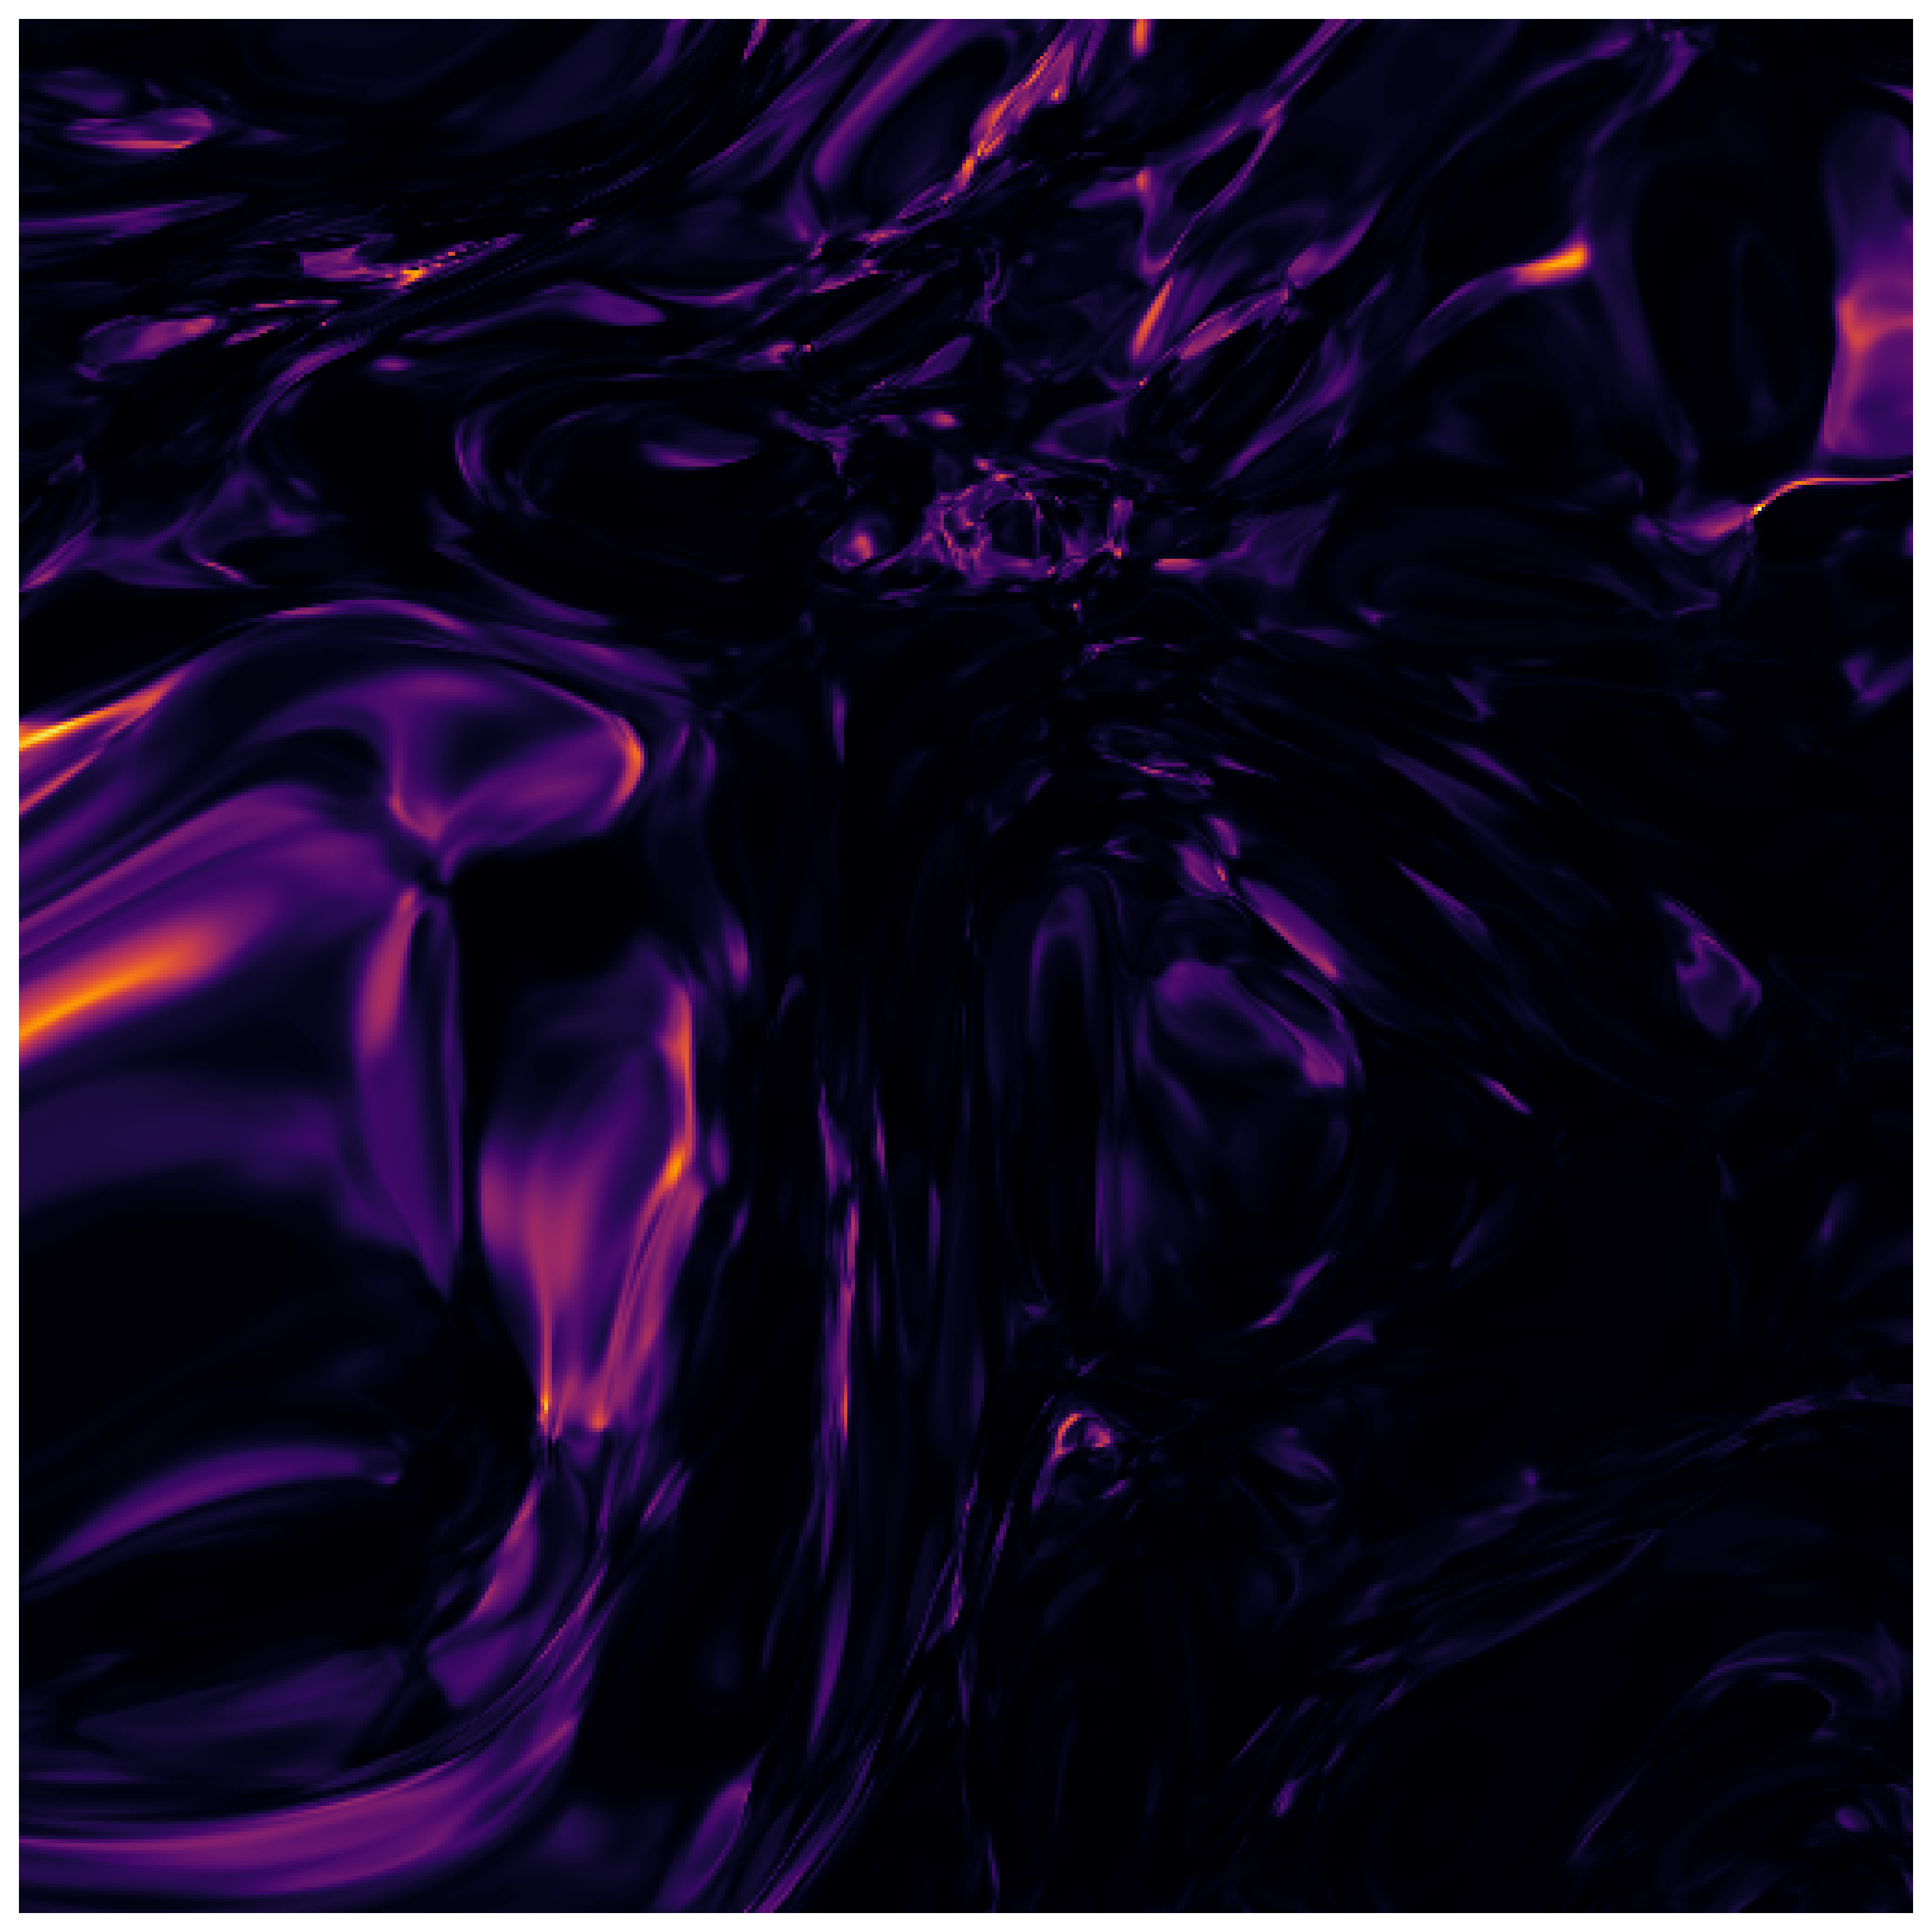

In [ ]:
deep_nn.visualize(grid_size=512, colormap='inferno')

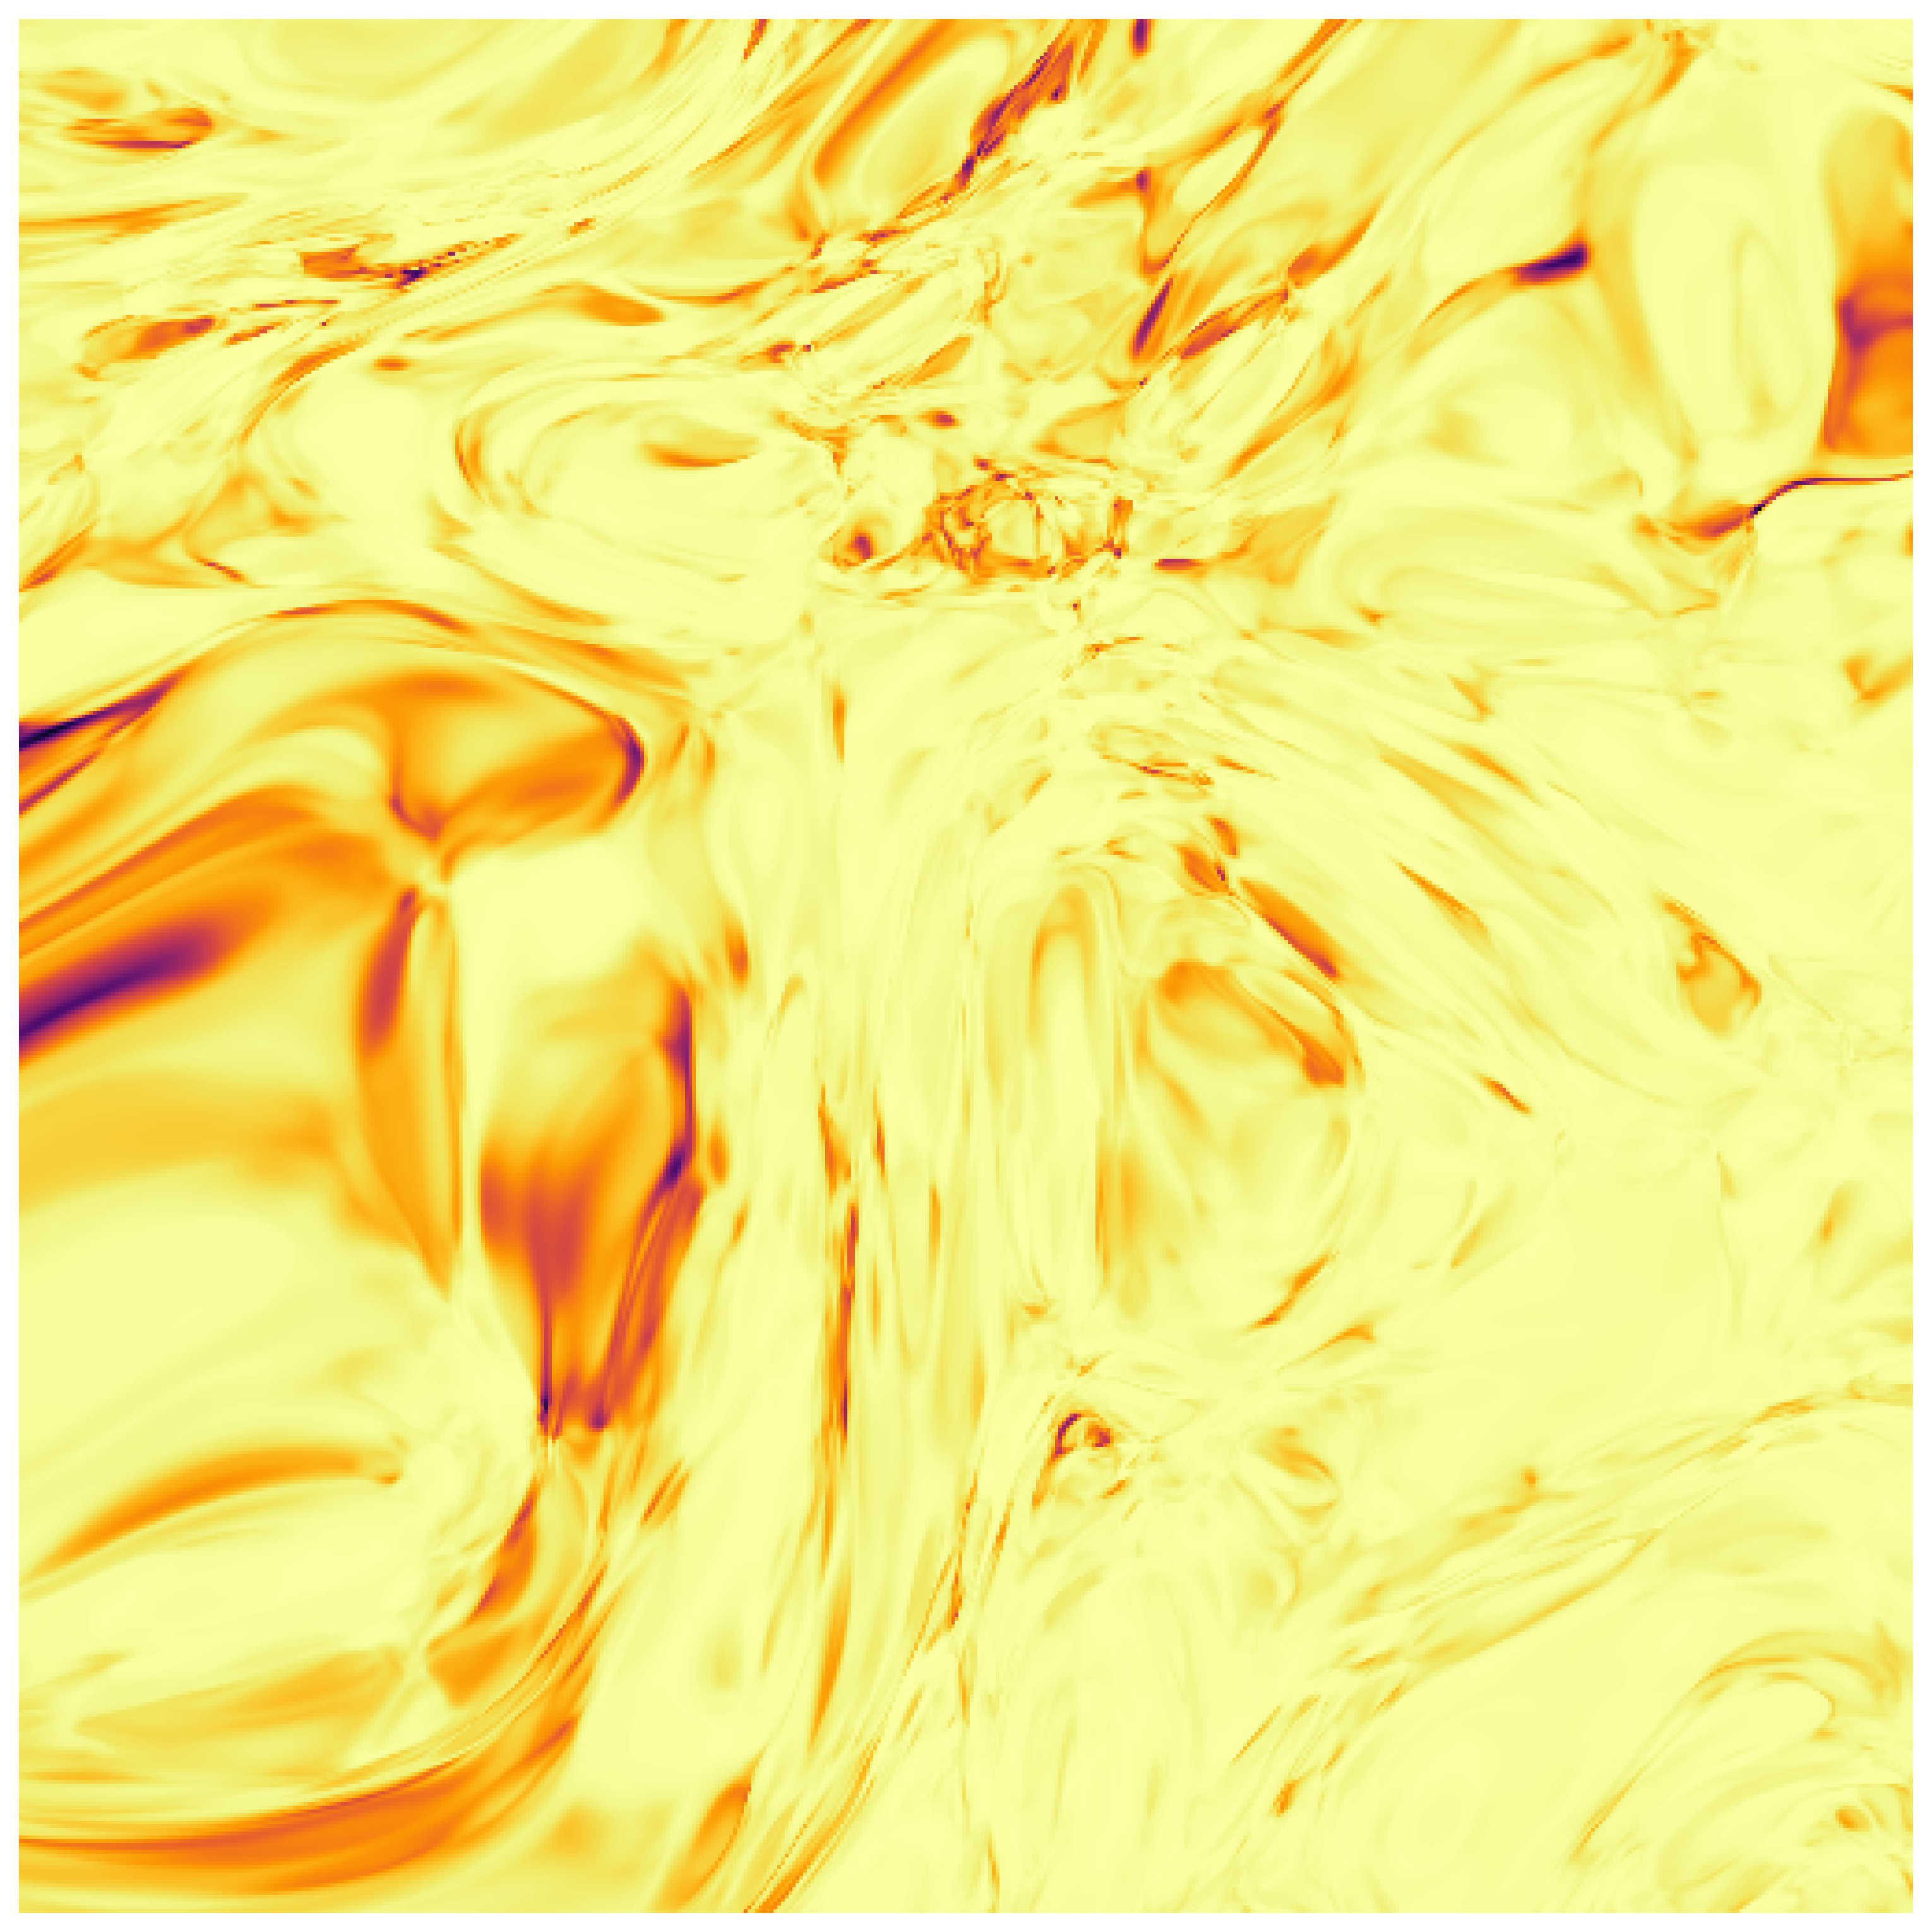

In [ ]:
deep_nn.visualize(grid_size=512, colormap='inferno', c_reverse=True)

  #LaTeX https://en.wikibooks.org/wiki/LaTeX/Mathematics#Powers_and_indices 
  Markdown https://paperhive.org/help/markdown



## Modelo para regresión lineal:

$$a(x) = b + w_1 x_1 + w_2 x_2 + ... + w_d x_d$$


Donde:


$$w_1,...,w_d$$ corresponde a pesos (weights)


$$b$$ bias o  sesgo


$$x_1,...,x_d$$ corresponde a las características (features)


Tiene parámetros d + 1, donde d es el número de características en el dataset 


Se puede escribir en forma de vector como:


$$a(x) = w^T x$$


El modelo lineal es básicamente un producto punto del vector de pesos (w) y el vector de características (x)


Para aplicar a un set completo o un set de ejemplos, podemos formar una matriz de l filas y d columnas:


X = 
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{l,1} & x_{l,2} & \cdots & x_{l,d} 
 \end{pmatrix}


cada fila corresponde a un ejemplo y cada columna corresponde a los valores de una característica en cada ejemplo y se multiplica por el vector w:


$$a(x) = Xw$$


Esta multiplicación nos da un vector de tamaño l y cada elemento es una predicción del modelo lineal para cada ejemplo.


## Función de pérdida (Loss function)

## Mean Squared Error (MSE)

Para medir la calidad o el error de un modelo en algún set. **Mide qué tan bien se ajusta el modelo a los datos, entre menor sea el MSE, mejor se ajusta el modelo a los datos** 




$$L(w) = \frac{1}{l}\displaystyle\sum_{i = 1}^{l}(w^T x_i - y_i)^2 =\frac{1}{l}\|Xw - y\|^2$$


Se toma un ejemplo en particular, se calcula una predicción del modelo para este ejemplo, para el modelo lineal es el producto punto de w y $$x_i$$, luego se resta el valor objetivo. Calculamos la desviación del valor objetivo del valor que se predijo, elevamos al cuadrado y realizamos el promedio del cuadrado de las desviaciones entre todo el set de entrenamiento.


Cuando está escrito en forma vectorial, se multiplica X por el vector w y obtenemos un vector de predicciones para todos los ejemplos en el set, luego se resta el vector de valores objetivo (respuestas reales) y luego se saca la norma euclidiana de este vector.


Se debe minimizar con respecto a w. Se quiere encontrar el set de parámetros w que nos de el mayor MSE en el set de entrenamiento, se optimiza la pérdida para encontrar el mejor modelo.

Solución analítica:

$$w = (X^T X)^ {-1} X^T y $$

Pero invertir matrices es muy complicado para grandes cantidades de datos y un sistema de ecuaciones lineales es muy caro (computacionalmente)


## Clasificación binaria


En este tipo de problemas se tienen solo dos valores para el objetivo, -1 y 1, es decir, la clase positiva y la clase negativa $$(y\in \{-1 , 1\}): a(x) = sign(w^T x)$$


Número de parámetros: $$d(w ∈ \mathbb{R}^d)$$


Se hace el producto punto entre el vector de pesos y el de características obteniendo un número real que debe transformarse en -1 o 1.


No es necesario incluir el sesgo explícitamente en el modelo, debido a que se asume que hay una característica constante que tiene el valor de uno en cada ejemplo. El coeficiente de esta constante será el sesgo.


El signo del producto punto indica en qué lado de la línea cae el punto.

![binaryClassification](https://drive.google.com/uc?export=view&id=1x4Ts3B2xPgEJxra7l2ZVoHjsmWHemwOn)


![signFunction](https://drive.google.com/uc?export=view&id=1fClo_4a8Bcdg9eMI_68odWRPmWGyFS37)


Al aplicar la función signo a la función de decisión se puede realizar una predicción. $$d(x) = w_0 + w_1 x_1 + w_2 x_2$$

$$a(x) = sign(d(x))$$


**Se pueden separar por una línea recta**


## Clasificación multiclase


En este tipo de clasificación se tienen K clases. Una aproximación común es construir un clasificador por separado para cada clase, se busca que los puntos correspondientes de una clase "caigan" del lado positivo del hiperplano y los demás en el lado negativo.


El producto punto del modelo es un puntaje, entre mayor sea el puntaje, el modelo será más confiable. Después se construye un modelo para cada clase y se tiene un número K de modelos lineales, donde cada modelo calcula el puntaje y luego se asigna el nuevo ejemplo a la clase que tiene mayor puntaje, la clase más confiable. 


$$ (y ∈ \{1,...,K\}): a(x) = arg  \max_{\substack{
   k∈(1,...,K)
  }} (\displaystyle\ w_{k}^{T} x)$$


Número de parámetros: $$K * d (w_k ∈ \mathbb{R}^d)$$


Por ejemplo: se tienen 3 clases: $$a(x) = 3$$ y un vector de puntajes z = (7 , -7.5 , 10) así que asignamos el ejemplo a la tercer clase, debido a que es el componente mayor.


_Corchetes Iverson [P] para escribir una declaración lógica, si es verdadera el valor de los corchetes es 1, si es falsa, el valor es cero_.

## Funciones de pérdida


## Exactitud de clasificación (accuracy)


$$\frac{1}{l}\displaystyle\sum_{i=1}^{l}[a(x_i) = y_i]$$


De un ejemplo xi, encuentra la predicción a de xi y compárala con el valor verdadero de la clase yi y escribe la igualdad de la predicción de la clase en corchetes de Iverson, por lo que el valor del corchete será uno si se ha adivinado la clase correctamente. Luego se realiza el promedio con todos los puntos del dataset. **Es una relación de los puntos correctamente clasificados**


Tiene dos desventajas, no tiene gradientes con respecto a los parámetros del modelo y se necesitan para la optimización de la función de pérdida.


Y no toma en cuenta la confiabilidad del modelo

## MSE

**Para regresión lineal**


Suponiendo que se tiene un ejemplo xi que corresponde a la clase positiva y se considera la pérdida al cuadrado (Squared loss) $$(w^T x_i - 1) ^2$$ Se toma el producto punto entre "w" y "x", se compara con 1 y se saca el cuadrado de la diferencia, **si el modelo predice 1**, la prediccióń es correcta  y la pérdida es cero. Si el valor se encuentra **entre 0 y 1**, la decisión no es confiable y se penaliza por ser poco confiable. Si el valor es **menor a 0**, entonces el punto ha sido clasificado incorrectamente y se le da una penalización mayor. Si el valor es **mayor a 1**, se penaliza porque puede ser sobreajustado.

$$L(w) = \frac{1}{l}\|Xw - y\|^2$$


## Transformación Softmax


Suponiendo un vector z, que tiene componentes $$z = (\displaystyle\ w_{1}^{T} x,..., (\displaystyle\ w_{k}^{T} x))$$

Dado que los productos punto pueden tener cualquier signo y cualquier magnitud, no se pueden interpretar como distribuciones de probabilidad, lo que se hace de la siguiente manera:


Se toma el primer componente del vector y se toma e elevado a ese componente $$e ^{z_1}$$


Esto se hace para todos los componentes $$(e ^{z_1}, ... , e ^{z_k})$$, de este modo se tiene un vector que tiene solo coordenadas positivas. Ahora, se necesita normalizar los componentes para obtener una distribución, para lo cual se suman los componentes de este vector y se divide cada componente entre la suma, con lo que se obtiene un vector $$σ(z)$$, que está normalizado y tiene solo componentes no negativos, por lo que puede ser interpretado como una distribución de probabilidad.


$$σ(z) = (\frac{e ^ {z_1}}{\sum_{k=1}^{K} e ^ {z_k}} , ... ,\frac{e ^ {z_k}}{\sum_{k=1}^{K} e ^ {z_k}}$$


Ejemplo: z = (7 , -7.5 , 10)





In [ ]:
import numpy as np
e1 = np.exp(7)
e2 = np.exp(-7.5)
e3 = np.exp(10)
s1 = e1 / (e1 + e2 + e3)
s2 = e2 / (e1 + e2 + e3)
s3 = e3 / (e1 + e2 + e3)

print(f"σ(z) = ({s1} , {s2} , {s3})")



σ(z) = (0.04742587204318125 , 2.391912771022222e-08 , 0.9525741040376909)


In [1]:
import numpy as np

def calcularZ(w,x,b):
    z = np.dot(w,x)+b
    return z

def activacion(z):
    y = 1 / (1 + np.exp(-z))
    return y

def capaNeuronal(w,x,b):
    z = calcularZ(w,x,b)
    y_pred = activacion(z)
    return y_pred

x = np.array([[1,2,3]]) #Entradas.
print("Tamaño de matriz de entrada X (# de características) = "+str(x.shape))

w = np.array([[1,2,3],   #Pesos de Neurona 1        
              [-1,-2,-3]])  #Pesos de Neurona 2
print("Tamaño de matriz de pesos W (neuronas x caracteristicas de entrada) = "+str(w.shape))

b = np.array([1,         #bias de neurona 1
              -1])        #bias de neurona 2
print("Tamaño de matriz de bias B (neuronas) = "+str(b.shape))

#w.T = W transpuesta. Rotamos la matriz para que encaje en np.dot()
y_pred = capaNeuronal(x,w.T,b)
print("Salida")
print(y_pred)
print("tamaño de salida (neuronas) = "+str(y_pred.shape))


Tamaño de matriz de entrada X (# de características) = (1, 3)
Tamaño de matriz de pesos W (neuronas x caracteristicas de entrada) = (2, 3)
Tamaño de matriz de bias B (neuronas) = (2,)
Salida
[[9.99999694e-01 3.05902227e-07]]
tamaño de salida (neuronas) = (1, 2)


Por lo tanto, el tercer elemento tiene la mayor probabilidad después de la transformación softmax, y era el más grande antes de ella.


## Entropía cruzada (Cross entropy)


Para medir la distancia entre las distribuciones de probabilidad entre un vector b, que es un vector objetivo que es un vector binario de tamaño K, donde K es el número de clases, y tiene un 1 en el componente que corresponde a la clase verdadera del ejemplo actual y ceros en el resto de las coordenadas. El vector b es de probabilidades de las clases predichas σ(z).


**Para clasificación**

$$ - \sum_{k=1}^{K} [y = k] log \frac{e ^ {z_k}}{\sum_{j=1}^{K} e ^ {z_j}} = - log \frac{e ^ {z_y}}{\sum_{j=1}^{K} e ^ {z_j}}$$


\- log de la probabilidad de la clase predicha para la clase verdadera 


Suponiendo que se tienen 3 clases y el ejemplo pertenece a la primer clase, suponiendo que se tiene un modelo que predice la probabilidad de 1 para la primer clase y cero probabilidades para la segunda y tercer clase, así que este modelo hace una predicción correcta

Puede ser usada como función de pérdida al sumar las entropías cruzadas de todos los ejemplos en el set de entrenamiento, pero no tiene solución analítica, por lo que se necesitan métodos numéricos para su optimización.

$$L(w) = - \sum_{i=1}^{l} \sum_{k=1}^{K} [y = k] log \frac{e ^ {w_{k}^{T} x_i}}{\sum_{j=1}^{K}{e ^ {w_{j}^{T} x_i}}}$$


## Descenso de gradiente (Gradient descent)


Es un método que puede optimizar cualquier función de pérdida diferenciable.


Suponiendo que se tiene una función de pérdida L(w) y que se quiere minimizar.


Se toma una inicialización $${w_0}$$ que es un punto en la superficie. Se quiere encontrar un mínimo local de la función, por lo que se requiere encontrar una dirección en la cual la función decremente en ese punto y tomar un paso en esa dirección.

Hay un vector de gradiente, que es un vector de derivadas parciales con respecto a todos los parámetros de la función y puntos de gradiente como la dirección de ascenso más pronunciado de la función.

$$∇L(w^0) = (\frac{\partial L(w^0)}{\partial w_1} , ... , \frac{\partial L(w^0)}{\partial w_n} - vector\_gradiente$$ 

Puntos del vector gradiente --> dirección del descenso más pronunciado de la función.

Para minimizar, se debe calcular el gradiente en el punto $$w^0$$ e ir en la dirección del anti gradiente (-gradiente), se toma $$w^1 = w^0 - η_1 ∇L(w^0)-gradiente$$

$$η_1 = Tasa\_de\_aprendizaje$$

La tasa de aprendizaje suele ser entre 0.01 y 0.001

Y se hace para los demás puntos


$$w^t = w^{t-1} - η_t ∇L(w^{t-1})$$ Si $$\|w^t - w^{t-1}\| < ϵ$$ se detiene si w^t está muy cerca a w^(t-1), ya que se considera que se ha alcanzado un mínimo.

![GradientDescent](https://drive.google.com/uc?export=view&id=1YqYH4VCosuij1tPOyrxPdTglJWYQ-zwT)

Se toma una inicialización w_0, se calcula el gradiente, se continúa en dirección del anti gradiente, se llega a w_1 y se calcula nuevamente el gradiente en ese punto, se continúa en dirección anti gradiente y así sucesivamente, en cierto punto converge al mínimo local de la función.

## Descenso de gradiente para MSE


$$L(w) = \frac{1}{l}\|Xw - y\|^2$$

Derivadas:

$$∇L_w(w) = \frac{2}{l}X^T(Xw - y)$$


Es más fácil de implementar que la solución analítica, no se requieren sistemas de ecuaciones lineales para calcular el mínimo de la función.


_Holdout set_ para calcular la igualdad, si la pérdida en el _holdout set_ no es tan alta, el modelo es bueno, pero si la pérdida es grande, puede ser que el modelo esté sobre ajustado (overfitted), generalmente su tamaño es del 20% o 30%

## Validación cruzada

Es recomendable realizar validación cruzada, en donde se divide el data set en k bloques de un tamaño aproximadamente igual, estos bloques son llamados  _folds_ , se toma el primer _fold_ y se usa como _holdout set_ y el resto como set de entrenamiento, se entrena el modelo, se evalúa su calidad, se valida, se calculan las métricas en este _fold_, después se usa el segundo _fold_ y se repite el procedimiento y se hace lo mismo con los demás bloques. Se usa como último paso el últomo _fold_ como _holdout set_ y todos los demás como conjunto de entrenamiento, luego se toma el promedio de los estimados de todas las iteraciones del procedimiento. 


Este procedimiento garantiza que cada ejemplo estará tanto en el conjunto de entrenamiento como en el de _holdout_ en algunas iteraciones.


Aunque para redes neuronales profundas (_Deep Neural Networks_) no es recomendable debido al tiempo que tomaría entrenar una neurona con un conjunto de datos grande. En estos casos se usa generalmente solo un _holdout set_.


##Regularización de modelos

Los modelos sobre ajustados tienen grandes pesos y los modelos buenos tienen pesos no tan grandes, para resolver el problema de sobre ajuste se modifica la función de pérdida

$$L_{reg}(w) = L(w) + λR(w) → min_w$$


Se toma la función inicial y se añade un regularizador R(w) que penaliza al modelo por grandes pesos y luego se minimiza esta nueva función de pérdida.

Como regularizador se puede usar la penalización L2 (**_L2 penalty_**), la cual suma los cuadrados de los parámetros sin incluir el sesgo (_bias_), es diferenciable, por lo que se puede usar cualquier método de descenso de gradiente para optimizarla.


$$L_{reg}(w) = L(w) + λ\|w\|^2 → min_w$$

Donde $$\|w\|^2 = \sum_{j=1}^{d} w_{j}^2$$

Este regularizador conduce a los coeficientes a un valor cercano a cero, por lo tanto, penaliza el modelo por pesos muy grandes.


En la penalización L1 (**_L1 penalty_**), se toman los valores absolutos de todos los pesos y se suman, sin incluir el sesgo (_bias_)


$$L_{reg}(w) = L(w) + λ\|w\|_1 → min_w$$

Donde $$\|w\|_1 = \sum_{j=1}^{d} |w_{j}|$$


Este regularizador no es diferenciable, por lo que se deben utilizar técnicas más avanzadas de optimización.

Tiene al menos dos soluciones y conduce algunos parámetros exactamente a cero.


# Regresión Logística


Predice la probabilidad de la clase positiva, su salida es la probabilidad de 1, a diferencia de la clasificación binaria, se reemplaza la función signo con la función sigmoidal.

![sigmoidFunction](https://drive.google.com/uc?export=view&id=1XD_auaUzIigkrW8Z-sD9xIv6kV7MTIiC)

Puede transformar cualquier valor en el rango de cero a uno, por lo que regresa probabilidades válidas.


La función $$ d(x) = w_0 + w_1 x_1 + w_2 x_2 $$ da la distancia del punto a la línea de separación y se puede convertir esta distancia en confiabilidad, ya que,  si se tiene un punto que cae cerca de la línea, entonces estamos en algún lugar en el borde de las clases y no estamos seguros de si es positivo o negativo o quizá sea ruido, pero si el punto se encuentra lejos de la línea, podemos estar seguros de su signo.

![distanceFromLine](https://drive.google.com/uc?export=view&id=1IAskyMjOvhO7HdXefce0JiyRF8erGWAo)


$$d(x) = w_0 + w_1 x_1 + w_2 x_2$$
$$a(x) = σ(d(x))$$


Si cae en cero, la función sigmoidal dará 0.5, por lo que exactamente no sabemos cuál es el signo (positivo o negativo). Entre más lejos esté de la línea, se tendrán valores mayores de la función sigmoidal y se tiene mayor confianza.

###Problema triangular

![triangleProblem](https://drive.google.com/uc?export=view&id=1ynVWF1euzVtgsrBXVv3s09dp3I4HGu8m)



Este problema no se puede resolver con una sola línea, pero se puede construir el número de líneas necesario para ayudar a resolver este problema.


![Lines](https://drive.google.com/uc?export=view&id=1WWWejCbFO-cIxS8LgOxu4gtvzGeB_Hxu)


Por ejemplo, la línea z_1 ayuda a separar los signos negativos de la izquierda

$$z_1 = σ(w_{0,1} + w_{1,1} x_1 + w{2,1} x_2)$$

Se puede usar esa predicción como una característica para más clasificaciones, ya que nos dice si el signo negativo está a la derecha o a la izquierda.


$$z_i = σ(w_{0,i} + w_{1,i} x_1 + w{2,i} x_2)$$

Y si se realizan las 3 líneas, cada una es una regresión logística. Lo siguiente es usar las predicciones de estas líneas como características nuevas en una tarea de machine learning. Para esto se puede tomar un punto y ver la predicción que se tiene con respecto a las otras líneas y se añade un vector objetivo a la tarea, se aplican tres modelos lineales y finalmente se aplica un modelo no lineal para obtener una predicción final. 

$$z_i = σ(w_{0,i} + w_{1,i}x_1 + w_{2,i}x_2)$$

$$a(x) = σ(w_0 + w_1 z_1(x) + w_2 z_2(x) + w_3 z_3(x))$$


Reescribiendo esta composición en un grafo computacional:

![ComputationalGraph](https://drive.google.com/uc?export=view&id=1yrolyNso9t9kZh1eLM_MysBWlPYKfVHJ)



Este contiene nodos que corresponden a variables calculadas como x_1, x_2 y los bordes corresponden a dependencias, si se tiene un borde que viene de x_1 a z_1, necesitamos a x_1 para calcular el valor de z_1.



##Perceptrón multicapa (_Multilayer Perceptron_) (MLP)


Es la neurona más simple

La primer capa es la **capa de entrada** (_input layer_), generalmente contiene características que se tienen como datos de entrada, la primer **capa oculta** (_hidden layer_), contiene $$z_1 , z_2 , z_3$$ cada nodo es la neurona.

Se llama neurona a "cualquier cosa" que tome una combinación lineal de sus entradas y aplique alguna función de activación no lineal, como la función de activación sigmoidal.

Luego, se tiene una **capa de salida** (_output layer_), que contine la predicción.

## Aproximando una neurona con regresión logística

**Es básicamente construido por una secuencia de la aplicación repetida de la regresión logística**


Se tienen entradas x_1, x_2 y 1, después, se tienen pesos, se multiplican las entradas por el peso y se suman, con base en esa suma se decide si es una señal de salida o no, luego se aplica la función de activación sigmoidal, la cual es llamada función de activación, debido a que es un indicador de aproximación "suave", así que se tiene una función que indica que si el valor es positivo, devuelva el valor de 1, de otro modo, devuelva 0.

Aquí se intenta suavizar el indicador, de tal modo que el problema se vuelva diferenciable, permite que la neurona artificial se active cuando cierta suma sea calculada, por lo que se llama función de activación.

Se puede decir que una neurona artificial es algo que es activada por correlación, por lo que si ve una entrada que es similar al patrón que trata de encontrar en los datos, entonces tiene una activación mayor en la salida.


El perceptrón multicapa puede tener más de una capa oculta y el número de capas ocultas así como el número de neuronas en cada capa oculta y la elección de la función de activación constituye la arquitectura del MLP.


![MLP](https://drive.google.com/uc?export=view&id=1jrX_Jrl_p7GELzd2pPCkRqd8guGCIdnH)


**Arquitectura de un MLP**


* Número de capas

* Número de neuronas en cada capa

* Función de activación

Una capa oculta en MLP es llamada **capa densa** o capa **completamente conectada**, debido a que todas las neuronas en las capas vecinas están conectadas entre sí.


https://github.com/IsauraRs/AzureNeuralNetworks/blob/master/AzureIA1.ipynb




  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9017999768257141


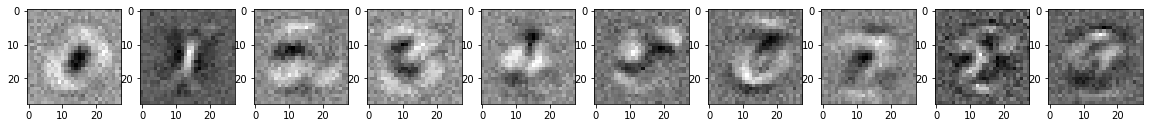

In [ ]:
# Regresión Logística
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm #Loop progress meter 

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

# Training
# Initialize parameters
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):

    # Sets the gradients of all optimized torch.Tensors to zero.
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28) #View converts inputs in rows, -1 to infer the dimension
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)

    # Backward pass
    cross_entropy.backward()
    optimizer.step()

# Testing
correct = 0
total = len(mnist_test)


'''Context-manager that disabled gradient calculation.
Disabling gradient calculation is useful for inference, 
when you are sure that you will not call Tensor.backward(). 
It will reduce memory consumption for computations that would otherwise have requires_grad=True.
'''
with torch.no_grad():

    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
      
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))

# Get weights
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')


Construyendo un grafo computacional en donde los bordes cambiarán su dirección y cada bode será asignado a una derivada


![ChainRule1](https://drive.google.com/uc?export=view&id=1ady9yk-WyCgxzoOoWU1dyE3W4FbjBp8-)


![ChainRule2](https://drive.google.com/uc?export=view&id=1c8ybz6Go90UZhEeEkLgXO9rGuDWTEdOZ)


Esto nos ayuda a aplicar la regla de la cadena, ya que trata de calcular la derivada de p con respecto de x_1 y si vemos todos los caminos, podemos ver que la regla de la cadena es la suma de todos esos caminos.


$$\frac{\partial p}{\partial x_1} = \frac{\partial p}{\partial z_1} \frac{\partial z_1}{\partial x_1} + \frac{\partial p}{\partial z_2} \frac{\partial z_2}{\partial x_1}$$ 


Tomando un ejemplo más complejo:

![ChainRule3](https://drive.google.com/uc?export=view&id=1DdgeJnKpuCEv9SZPT6uBFxIr_9-C20Cx)


Donde:

$$z_1 = z_1(x_1 , x_2)$$ $$h_1 = h_1 (z_1 , z_2)$$ $$z_2 = z_2(x_1 , x_2)$$ $$ h_2 = h_2(z_1 , z_2)$$
$$p = p(h_1  , h_2)$$

Lo que se trata de calcular es dp/dx_1

$$\frac{\partial p}{\partial x_1} = \frac{\partial p}{\partial h_1} \frac{\partial h_1}{\partial x_1} + \frac{\partial p}{\partial h_2} \frac{\partial h_2}{\partial x_1}$$ 


Para esto se necesita aplicar nuevamente la regla de la cadena 


![ChainRule4](https://drive.google.com/uc?export=view&id=1wov6rn0SjnFz-fV0vwnZHmiUKutN_Q81)


$$\frac{\partial p}{\partial x_1} = \frac{\partial p}{\partial h_1} \frac{\partial h_1}{\partial z_1} \frac{\partial z_1}{\partial x_1} + \frac{\partial p}{\partial h_1} \frac{\partial h_1}{\partial z_2} \frac{\partial z_2}{\partial x_1}  + \frac{\partial p}{\partial h_2} \frac{\partial h_2}{\partial z_1} \frac{\partial z_1}{\partial x_1} + \frac{\partial p}{\partial h_2} \frac{\partial h_2}{\partial z_2} \frac{\partial z_2}{\partial x_1}$$ 


Para calcular una derivada de un nodo _a_ a otro nodo _b_:

1. Encontrar un camino que no ha sido visitado de _a_ a _b_ 

2. Multiplicar todos los valores de los bordes que se encuentran en ese camino

3. Agregar a la derivada resultante.
 
4. Repetir los pasos anteriores



### ¿Cómo ayuda la regla de la cadena a entrenar una neurona?



![ChainN1](https://drive.google.com/uc?export=view&id=1fQQI8Dlg9a5iV7t5We_J5AOuLThuNszr)


Se tienen características de entrada x_1 y x_2, los nodos alpha y beta, los cuales son los parámetros que se necesitan entrenar y se hace una combinación lineal de x_1 y x_2 con los pesos, luego se suman y se le aplica la función de activación sigmoidal para obtener una predicción z.


Para entrenarla, agregamos una función de pérdida L, cuyos valores de entrada son la predicción obtenida z y el valor objetivo y, el cual es una respuesta verdadera para la predicción, esta función de pérdida nos dice si la predicción ha sido buena o no.


Para que el descenso de gradiente funcione, necesitamos encontrar las derivadas de la función de pérdida con respecto a alpha y a beta.


![ChainN2](https://drive.google.com/uc?export=view&id=15y2FJdsIl3KaruKL6qMYPAjzes0y5p3O)


Se aplican los pasos mencionados, se encuentra el camino que nos lleva de L a alpha y se multiplican los valores de los bordes.


![BackProp](https://drive.google.com/uc?export=view&id=1jSznNXtmHCIPPVVcR9aRsHo3jJJlKzVQ)

 


Si se tienen que encontrar todas las derivadas anteriores, se pueden reutilizar los cálculos.


Se empieza desde la capa más profunda y podemos observar que dp/dh_1 y dp/dh2 serán utilizados en todas las demás capas, por lo que se puede almacenar su valor en algún lugar para poder utilizarlos después.

Luego vamos a la primer capa oculta, y podemos ver valores que ya han sido calculados anteriormente.


![BackProp1](https://drive.google.com/uc?export=view&id=1YsDj-cRQFKDdxDW4tk6pQql4f7Tjcp_E)


## Retropropagación (_Back-propagation_)

El procedimiento anterior es llamado diferenciación de modo inverso y en redes neuronales, es llamado retropropagación, es rápido debido a que reutiliza cálculos de pestañas previas 


Tiene dos pases, el primero es un pase hacia adelante 
 y el segundo es hacia atrás, el primero está hecho en el gráfico original y el segundo en el gráfico de derivadas.


Cuando se realiza el gradiente de descenso estocástico (SGD), no solo se necesita calcular la derivada, también se necesita la derivada en cierto punto, de tal modo que se mueva de ese punto en dirección de la derivada, para eso se necesita saber en qué puntos calcular la derivada.


Para agregar la función sigmoidal, se necesita agregar interfaces para que funcione la retro propagación, la primera es el paso hacia adelante, se necesita saber cómo los nodos toman una entrada y la transforman durante este paso para producir una salida. En este caso, se toman los valores de entrada y se les aplica la función de activación sigmoidal (puede hacerse con NumPy). **Calcula la predicción y la pérdida**


En el paso hacia atrás, se necesita encontrar el camino de la función de pérdida a la salida de la función sigmoidal y multiplicar todos los valores en el camino y ahora debe transformarse. **Calcula los gradientes y hace un paso del SGD**

No toma solamente la entrada en donde se hará la derivada, toma también un gradiente de entrada. Por dentro, se puede multiplicar el gradiente de la función sigmoidal con respecto a su entrada en ese valor de entrada y multiplicarlo por dL/dσ 


![BackProp1](https://drive.google.com/uc?export=view&id=1t6KYmUXxr6k422cM7__kLsP2nf87OrBV)


Este es el modo en el que se entrenan algunas redes neuronales en la actualidad.



In [ ]:
import numpy as np

def forward_pass(inputs):

  return 1 / (1 + np.exp(-inputs))

def backward_pass(inputs , incoming_gradient):

  sigmoid = 1 / (1 + np.exp(-inputs))

  return sigmoid * (1 - sigmoid) * incoming_gradient


In [ ]:
# Si se hace con PyTorch

# Forward pass
x = images.view(-1, 28*28)
y = torch.matmul(x, W) + b

cross_entropy = F.cross_entropy(y, labels)

# Backward pass
cross_entropy.backward()
optimizer.step()

Una capa densa puede ser reemplazada con multiplicación de matrices. En el siguiente ejemplo se muestran 2 neuronas (z_1 y z_2), que tienen sus pesos correspondientes en la primer columna de la matriz W y en la segunda columna, una fila x, la cual contiene las características de entrada.


$$(x_1  x_2  x_3) * \begin{pmatrix}
  w_{1,1} & w_{1,2}\\
  w_{2,1} & w_{2,2} \\
  w_{3,1} & w_{3,2} 
 \end{pmatrix} = (z_1 z_2)$$

 Lo que es equivalente a $$z_1 = x_1 w_{1,1} + x_2 w_{2,1} + x_3 w_{3,1} \\
 z_2 =  x_1 w_{1,2} + x_2 w_{2,2} + x_3 w_{3,2}$$

 y se escribe xW = z


 Se utiliza multiplicación de matrices debido a que se puede realizar eficiente


 Paso hacia adelante para una capa densa:


 ```python
 def forward_pass(X , W):

  return X.dot(W)

#Backward pass

def backward_pass(X , W , dZ):

  dX = dZ.dot(W.T)
  dW = X.T.dot(dZ)
  return dX , dW
 ``` 

 ## Tensorflow

 Es una herramienta para describir gráficos de cálculo.

 Tiene una red de nodos, cada una representa una operación, conectada a la otra, como entradas y salidas.

 Se pueden ejecutar los gráficos en CPU o GPU o en una unidad de procesamiento de tensores (TPU), también se puede correr en un nodo o en modo distribuido.

 Tiene dos tipos de entrada:

 1. Placeholder: es un lugar para un tensor, el cual puede ser alimentado durante la ejecución del gráfico, pueden ser características de entrada, se conoce el tamaño y el tipo de las características, pero podríamos no tenerlas al momento de definir el gráfico.

```python
import tensorflow as tf
 x = tf.placeholder(tf.float32 , (None , 10))
 ```
 2. Variable: es un tensor con un valor que es almacenado y actualizado durante la ejecución, podría ser una matriz de pesos en un MLP. Se puede definir ajustando la forma y el tipo que recibirá.

 ```python
 w = tf.get_variable("w" , shape = (10 , 20) , dtype = tf.float32)

 w = tf.Variable(tf.random_uniform((10 , 20)) , name = "w")
 ```

 3. Constante: es un tensor de valor constante, no puede ser cambiado y puede ser fácilmente definido utilizando Numpy o alguna otra entrada.

 ```python
 c = tf.constant(np.ones((4,4)))
 ```


### Producto de matrices

```python
 x = tf.placeholder(tf.float32 , (None , 10))

 w = tf.Variable(tf.random_uniform((10 , 20)) , name = "w")

 z = x @ w

 print(z)
 ```
 Aquí no se ha realizado un cálculo, solo se definió un gráfico

 Para correr un grafo se necesita un objeto de sesión, que encapsule el entorno, en el cual los objetos son ejecutados y evaluados.

```python
 s = tf.InteractiveSession()
```

Para ejecutar una operación es necesario correrlo en la sesión el objeto y así se obtiene el resultado real del cálculo, de otro modo, arrojará un tensor extraño.

```python
a = tf.constant(5.0)
b = tf.constant(6.0)

c = a * b

print(c) #Esto no dará el resultado
print(s.run(c)) #Esto sí
```

Cuando ya no son necesarios los recursos se debe hacer 
```python
tf.Session.close()
```

Se deben inicializar las variables en su entorno

```python
s.run(tf.global_variables_initializer())
```

Se pueden ver las variables que pueden ser entrenadas con el siguiente comando:

```python
tf.trainable_variables()
```
keras → Tensorflow API


## Ejemplo simple



El siguiente ejemplo ajusta los datos para la función y = (2 * x) - 1


Para definir una capa de neuronas conectadas se declara el modelo:




In [ ]:
model = keras.Sequential([keras.layers.Dense(units = 1 , input_shape = [1])])

Solo hay una capa y una sola unidad, por lo que hay una sola neurona.


Las capas siguientes están definidas en una secuencia, por lo que se usa la palabra "Sequential". 


Se define la forma de los datos de entrada de la red neuronal en la primer capa 


El siguiente código sirve para definir las funciones de optimización y de pérdida 

In [ ]:
model.compile(optimizer = 'sgd' , loss = 'mean_squared_error')

La función de pérdida mide qué tan buena o mala fue la predicción y pasa los datos al optimizador, el cual realiza la siguiente predicción y por lo tanto, la siguiente predicción debe ser mejor que la anterior. 


Conforme mejora la predicción, la exactitud se acercará más al 100%, es decir, converge.


Después se definen los datos y las etiquetas




In [ ]:
xs = np.array([-1.0 , 0.0 , 1.0 , 2.0 , 3.0 , 4.0] , dtype = float)

ys = np.array([-3.0 , -1.0 , 1.0 , 3.0 , 5.0 , 7.0] , dtype = float)

Después se ajusta el modelo, se indica que ajuste los valores de xs para los valores de y, las épocas (_epochs_) indican que hará un entrenamiento iterativo 500 veces, hace una predicción, mide qué tan buena o mala fue con la función de pérdida, utiliza el optimizador y los datos para hacer la siguiente predicción y se repite el proceso.


In [ ]:
model.fit(xs , ys , epochs = 500)


Cuando ha terminado el entrenamiento devuelve una predicción para un nuevo valor con el método predict

In [ ]:
print(model.predict([10.0]))

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units = 1 , input_shape = [1])])

model.compile(optimizer = 'sgd' , loss = 'mean_squared_error')

xs = np.array([-1.0 , 0.0 , 1.0 , 2.0 , 3.0 , 4.0] , dtype = float)
ys = np.array([-3.0 , -1.0 , 1.0 , 3.0 , 5.0 , 7.0] , dtype = float)

model.fit(xs , ys , epochs = 500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 1s 533ms/step - loss: 11.2169
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 9.0433
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 7.3287
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 5.9753
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 4.9063
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 4.0610
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 3.3918
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 2.8613
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 2.4400
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 2.1046
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 1.8370
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 1.6227
Epoch 13/500
1/1 [==============================] - 0s 7

La predicción debería ser 19, sin embargo, no tiene suficientes datos además de que se basa en probabilidades, por lo que hará una predicción "realista" para el valor.

# Convolutional Neural Networks

![CNN](https://drive.google.com/uc?export=view&id=1wvQt-v-ekeNEZG2ZgjDOlwbYmyw_huyg)


Cada pixel en una imagen almacena la intensidad o brillo, que tiene un valor que va de 0 a 255 para imágenes en escala de grises, donde 0 corresponde al color negro y los colores claros a valores cercanos a 255.


Para imágenes a color, los pixeles almacenan intensidades para tres canales, rojo, verde y azul.


Los valores de entrada de los pixeles deben estar normalizados, para esto se utiliza la siguiente fórmula:


$$x_{norm} = \frac{x}{255} -  0.5$$


De este modo tenemos los valores normalizados y un promedio de cero.


Se considera que las imágenes están compuestas por subconjuntos de "motivos" desplazados, cada motivo está compuesto a su vez por subconjuntos desplazados que se repiten a lo largo de la imagen, que están compuestos por  elementos atómicos que son las formas fundamentales.


![Hierarchical](https://drive.google.com/uc?export=view&id=1kUezuTTKi_TxLboilXm3n4mDbK1QWuQ0)



Lo que se busca es construir un modelo que capture la estructura / representación de las imágenes.


### Filtros convolucionales 

![CNN](https://drive.google.com/uc?export=view&id=1_VBgQakxNnp_5nVKFaP_UTgKqQ4ZpQ4_)

Se comienza en la parte superior de la imagen y se busca uno de los elementos atómicos, se desplaza el elemento atómico a todas las ubicaciones en la imagen y se calcula una correlación que indique qué tan parecida es la region en la imagen con respecto al elemento y a eso le llamaremos **filtro**.



Cuando se coincide el elemento con una parte de la imagen, se tiene una correlación alta o una gran coincidencia.


Lo que se busca es un mapa de características que muestre el grado de coincidencia o correlación entre el filtro "atómico" con cada ubicación en la imagen. 


Al proceso mediante el cual se desplaza el elemento atómico  a cada ubicación en la imagen, es llamado **convolución**, en una red neuronal convolucional, se manifiesta al desplazar el filtro a todas las ubicaciones en la imagen.


**Es el producto punto entre un filtro o núcleo (_kernel_) y el parche de una imagen, o campo receptivo local, del mismo tamaño, estas matrices deben estar "aplastadas" (_flattened_).**


Se desplazan todos los elementos atómicos uno por uno por toda la imagen y se obtiene un mapa de características para cada elemento atómico, lo que nos da una primer capa de mapas de características.


![CNNF](https://drive.google.com/uc?export=view&id=1sEz01455mGPK2hHrJmlbXzjpuN3_c3Vz)


Este proceso se repite para encontrar los "sub motivos", que son combinaciones de los elementos atómicos, pero, los filtros ahora son muchos apilados de elementos atómicos, lo que se espera es que las capas correspondientes a los mapas de características del elemento buscado, tengan una gran coincidencia, después esta segunda capa de filtros se convoluciona con los mapas de características de la primer capa, lo que nos dará un nuevo conjunto de mapas, que será la segunda capa de mapas característicos, que nos dirá en qué parte de la imagen se encuentran los sub motivos.


![CNNF1](https://drive.google.com/uc?export=view&id=1aW1Zt5xkpwxLRqWHE3dezPD3e7t6yZwj)


![CNNF2](https://drive.google.com/uc?export=view&id=1mkaAosKpzSjF0t9QmcRAblK1xYkgvBs4)


Finalmemte, se hace una decisión de clasifición, que estará basado en las características de la cima del modelo, es decir, la tercer capa, que es de mapas de características.


### Modelo matemático


En una imagen real, los elementos atómicos son los parámetros ϕ1,...,ϕk que son los valores de los pixeles y lo que queremos es aprender los valores de los pixeles asociados al filtro ϕ, asumiendo que conocemos  el valor de los pixeles, podemos desplazarlos a todas las ubicaciones en la imagen y obtener el apilado de mapas de características, que denotaremos como $$M_n = f(I_n ; ϕ_1,...,ϕ_k)$$ para la enésima imágen y el proceso se repite, pero ahora se convoluciona la capa 1 de mapas de características con la capa 2 de filtros, donde los filtros ahora serán denotados como Ψ_1,..., Ψ_k y el apilado de los mapas será $$L_n = f(M_n; Ψ_1,...,Ψ_k)$$ Se aprenden los parámetros Ψ, donde se tendrá una tercer capa de filtros ω_1,...,ω_k, se convoluciona con la segunda capa de mapas de características y se obtiene la tercer capa de características, denotado por $$G_n = f(L_n; ω_1,...,ω_k)$$, una vez que se tiene este apilado de mapas de la tercer capa, se puede construir el clasificador, al cual debemos proporcionarle una etiqueta (_label_) para la imagen, esta etiqueta será denotada como $$\mathscr{l}(G_n ; W) = l_n$$ Donde W representa a los parámetros del clasificador.


![CNNMathModel](https://drive.google.com/uc?export=view&id=1Zt8-OTJFj_hddC-IcdlZagKkW6M5KLYU)



* Datos etiquetados

* Etiquetas binarias (de preferencia)

* Función de energía → calcula la pérdida entre la etiqueta verdadera y la etiqueta dada por el modelo $$E(ϕ, Ψ, ω , W) = 1/N ∑ loss (y_n , l_n)$$ donde y_n es la etiqueta verdadera. Lo que queremos es que la diferencia sea lo más pequeña posible.

* Función de riesgo de los parámetros del modelo

* Encontrar los parámetros del modelo que minimicen la pérdida


## Convoluciones y _Pooling_

Para cada pixel, toma su valor y "ve" el valor de los pixeles cercanos, si el filtro es 3 x 3, podemos ver en los pixeles cercanos y así se tiene una malla de 3 x 3.


Para tener el siguiente valor para el pixel, se multiplica cada pixel próximo por el valor del filtro

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

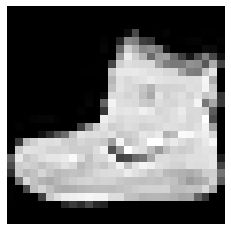

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) , (test_images, test_labels) = fashion_mnist.load_data()

np.set_printoptions(linewidth = 200)

#Índice de la imagen que se mostrará
img_index = 0

plt.imshow(training_images[img_index] , cmap = 'gray')
plt.axis(False)

#print("Label: ", training_labels[img_index])
#print("Matrix: ", training_images[img_index])
print(training_labels[img_index])
print(training_images[img_index])

Por ejemplo, si se tiene el siguiente filtro:
$$\begin{bmatrix}
-1 & 0 & -2\\
0.5 & 4.5 & -1.5\\
1.5 & 2 & -3
\end{bmatrix}$$ 


Y un pixel que tiene un valor de 207 y el pixel de la esquina suoerior izquierda es cero, el valor de la esquina superior izquierda del filtro es -1, se multiplica 0 * (-1) y se hace lo mismo para los demás pixeles cercanos:

pixel_actual = 207

nuevo_valor = (-1 * 0) + (0 * 155) + (-2 * 236) +  (0.5 * 69) + (4.5 * 207) + (-1.5 * 223) + (1.5 * 200) + (2 * 232) + (-3 * 232)

Y este proceso se repite para cada pixel con un filtro.


Hay algunas convoluciones que enfatizan algunas características de la imagen.

Pooling es una manera de comprimir una imagen, una manera rápida de realizarlo es ir sobre la imagen a cuatro pixeles al mismo tiempo, como en el pixel actual y en los pixeles cercanos debajo de él y a la derecha, de esos cuatro, elegir el que tiene un valor mayor.

**Hace que sea más fácil manejar la imagen**


![Pooling](https://drive.google.com/uc?export=view&id=14fJLBd2EQnW42ijTMbhxcQAonZiJEt3i)


En este ejemplo, nos quedaríamos con 


$$\begin{bmatrix}
207 & 236 \\
232 & 233
\end{bmatrix}$$ 


Esto preserva las características resaltadas por la convolución y al mismo tiempo divide en cuatro el tamaño de la imagen.


Para hacerlo en código se definen las capas.


En el siguiente ejemplo, se tiene una capa de entrada con la forma de los datos y una capa de salida con la forma del número de categorías que se quieren definir, así como una capa oculta en medio.

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu) , #128 neuronas
                                    tf.keras.layers.Dense(10 , activation = tf.nn.softmax) #10 neuronas
])

La capa flatten, toma el cuadro de 28 * 28 imagenes y lo convierte un arreglo de una sola dimensión, para agregar convoluciones:


In [ ]:
model = tf.keras.models.Sequential([
                                    #Se especifica la primer convolución, se generan 64 filtros de 3 * 3 con 
                                    #función de activación ReLU para eliminar valores negativos y la forma de la salida
                                    # de 28 * 28 y se indica que se utiliza solo un byte para la profundidad del color, 
                                    #ya que está a escala de grises
                                    #Por cada imagen se realizan 64 convoluciones
                                    tf.keras.layers.Conv2D(64 , (3 , 3) , activation = 'relu', input_shape = (28 , 28 , 1)),
                                    #Se define la capa de Pooling, es MaxPooling porque se está tomando el valor mayor, es 2 * 2
                                    #para que por cada 4 pixeles tome el mayor
                                    tf.keras.layers.MaxPooling2D(2 , 2) ,
                                    #Se añade una capa más de convolución y de Pooling, de tal modo que la red realice otro set de convoluciones
                                    #sobre la existente y haga pooling de nuevo para reducir su tamaño
                                    tf.keras.layers.Conv2D(64 , (3 , 3) , activation = 'relu') ,
                                    tf.keras.layers.MaxPooling2D(2 , 2) ,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu') , 
                                    tf.keras.layers.Dense(10 , activation = 'softmax')                                  
])

El método model.summary() permite inspeccionar las capas del modelo y ver el cambio en la imagen a través de las convoluciones.


No se puede calcular el filtro para el primer pixel en la esquina superior izquierda, debido a que no hay más pixeles sobre él ni a su izquierda y pasa del mismo modo con los pixeles en el borde de la imagen, por lo que el primer pixel en donde se pueden realizar cálculos es el segundo de la segunda fila y la segunda columna.


Por lo tanto, no se puede usar un margen de un pixel al rededor de la imagen, así que la salida de la convolución será de un tamaño 2 pixeles menor en x y 2 pixeles menor en y, si el filtro es 5 * 5, la salida será 4 pixeles menor en x y en 4 y $$salida\_convolución = tamaño\_imagen - (tamaño\_filtro - 1)_{x,y}$$



In [ ]:
#Sin convolución ni Pooling
import tensorflow as tf

#Se carga el Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

#Se normaliza el valor de los pixeles
training_images = training_images / 255.0
test_images = test_images / 255.0

#Se define el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Se declaran los parámetros de entrenamiento
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Se entrena el modelo
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

#Se evalúa
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


4431872/4422102 [==============================] - 0s 0us/step

MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5020 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8916

MODEL EVALUATION:
313/313 [==============================] - 1s 1ms/step - loss: 0.3398 - accuracy: 0.8738


In [ ]:
#Con Convolución y Pooling

#Se define el modelo
model = tf.keras.models.Sequential([
                                                         
  #Se añaden convoluciones y max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.summary()

#Se declara el optimizador, la función de pérdida y la métrica para evaluar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


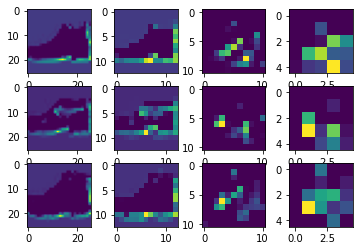

In [ ]:
#Para observar el cambio de la imagen através de las convoluciones y pooling

#Etiquetas de las imágenes
print(test_labels[:100])

import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
  axarr[2,x].grid(False)


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

def examplePooling(FIRST_IMAGE=0 , SECOND_IMAGE=23 , THIRD_IMAGE=28 , CONVOLUTION_NUMBER = 1):


  f, axarr = plt.subplots(3,4)

  layer_outputs = [layer.output for layer in model.layers]
  activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

  for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='viridis')
    axarr[2,x].grid(False)

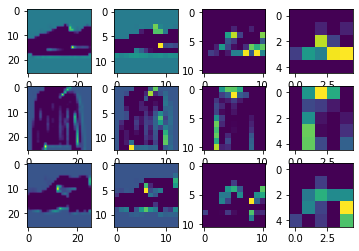

In [ ]:
examplePooling(9 , 6, 23, 4)

## Filtros

Cuando el parche o bloque que se utiliza en la convolución es de un relleno sólido, la suma es igual a 0, lo que nos da un color negro al aplicar un filtro y podemos usarlo como detector de bordes, ya que en donde se tiene un borde, es lo contrario al relleno sólido y tendremos una activación diferente a 0.

$$\begin{bmatrix}
-1 & -1 & -1\\
-1 & 8 & -1\\
-1 & -1 & -1
\end{bmatrix}$$ 

También es posible utilizar un filtro que afila (incrementa la intensidad de) los bordes (_sharpening filter_).


$$\begin{bmatrix}
0 & -1 & 0\\
-1 &  5 & -1\\
0 & -1 & 0
\end{bmatrix}$$ 


Este filtro no funciona como detector de bordes y para rellenos sólidos devuelve el mismo color, pero cuando hay un borde, añade intensidad.


Otro filtro utilizado es para difuminar, saca el promedio de los valores de entrada y de ese modo se pierden detalles.

$$\frac{1}{9} * \begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}$$ 


En la capa convolucional se usa el mismo núcleo para cada salida de la neurona, de este modo, se comparten parámetros de la red para entrenar mejor el modelo.


Las imágenes a color tienen 3 canales de entrada, por lo que pasa de ser una matriz a un tensor (arreglo multidimensional) W x H x C_in, donde W es el ancho de la imagen, H es la altura y C_in es el número de canales de entrada (p.ej. 3 canales RGB)


Para aplicar una convolución, el núcleo se vuelve también un tensor, de tamaño W_k x H_k x C_in y se extraen parches volumétricos de la imagen, se realiza el producto punto con el kernel y se obtiene una salida en un mapa de características. Si se mueve ese parche, se obtiene una salida en una ubicación diferente en el mapa de características. Se necesita más de un filtro debido a que se pierde profuncidad, lo que significa que se debe entrenar C_out núcleos de tamaño W_k x H_k x C_in 


## Padding 



## Back propagation



